<a href="https://colab.research.google.com/github/FloAI/Thesis/blob/main/Master's_thesis_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==0.2.29

from roboflow import Roboflow
rf = Roboflow(api_key="rLhpZBL1wNIelneuk4u9")
project = rf.workspace("iu-internationale-hochschule").project("master-s-thesis-part-one")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=bad627ace53e44e18d90f8d01202e14c41840fbb6d65b4027f446ae46ef55b7a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstal

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Master's-thesis-Part-One-1 in yolov8:: 100%|██████████| 498/498 [00:00<00:00, 1612.19it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data="/content/datasets/Master's-thesis-Part-One-1/data.yaml" epochs=1000 imgsz=800 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Master's-thesis-Part-One-1/data.yaml, epochs=1000, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dyn

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data="/content/datasets/Master's-thesis-Part-One-1/data.yaml"

2023-10-01 20:30:08.577059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 20:30:09.553457: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139129 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Master's-thesis-Part-One-1/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.27it/s]
                   all         20        261       0.33      0.275      0.288      0.123
                 KIOSK       

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source="/content/datasets/Master's-thesis-Part-One-1/test/images" save=True

2023-10-01 20:32:03.454337: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 20:32:04.371917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11139129 parameters, 0 gradients, 28.5 GFLOPs
image 1/10 /content/datasets/Master's-thesis-Part-One-1/test/images/1695900885185_jpg.rf.340a59291891258e3452ca2b5e42720b.jpg: 800x800 5 Persons, 4 bikes, 4 cars, 1 umbrella, 31.1ms
image 2/10 /content/datasets/Master's-thesis-Part-One-1/test/images/1695900885321_jpg.rf.c872cbd0e59443ab736de41f723521eb.jpg: 800x800 2 buildings, 5 cars, 2 electric poles, 24.9ms
image 3/10 /content/datas

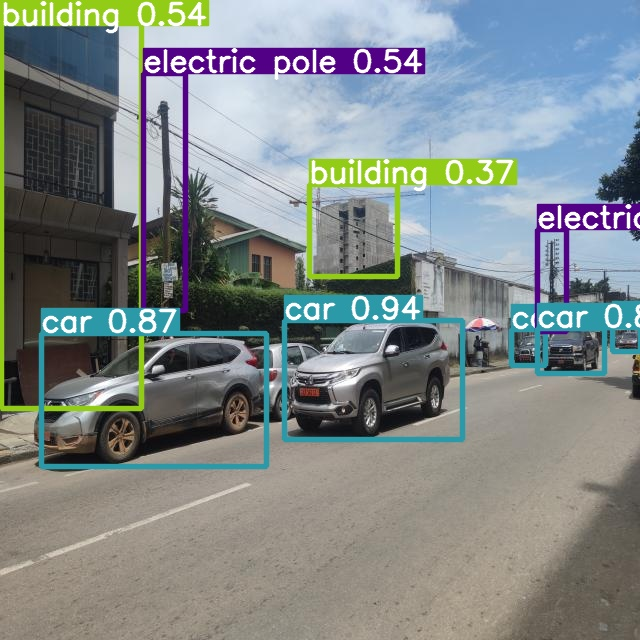

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/1695900885321_jpg.rf.c872cbd0e59443ab736de41f723521eb.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!ls /content/runs/detect/train

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1260.jpg
events.out.tfevents.1696187523.595be1d04a6d.1601.0  train_batch1261.jpg
F1_curve.png					    train_batch1262.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


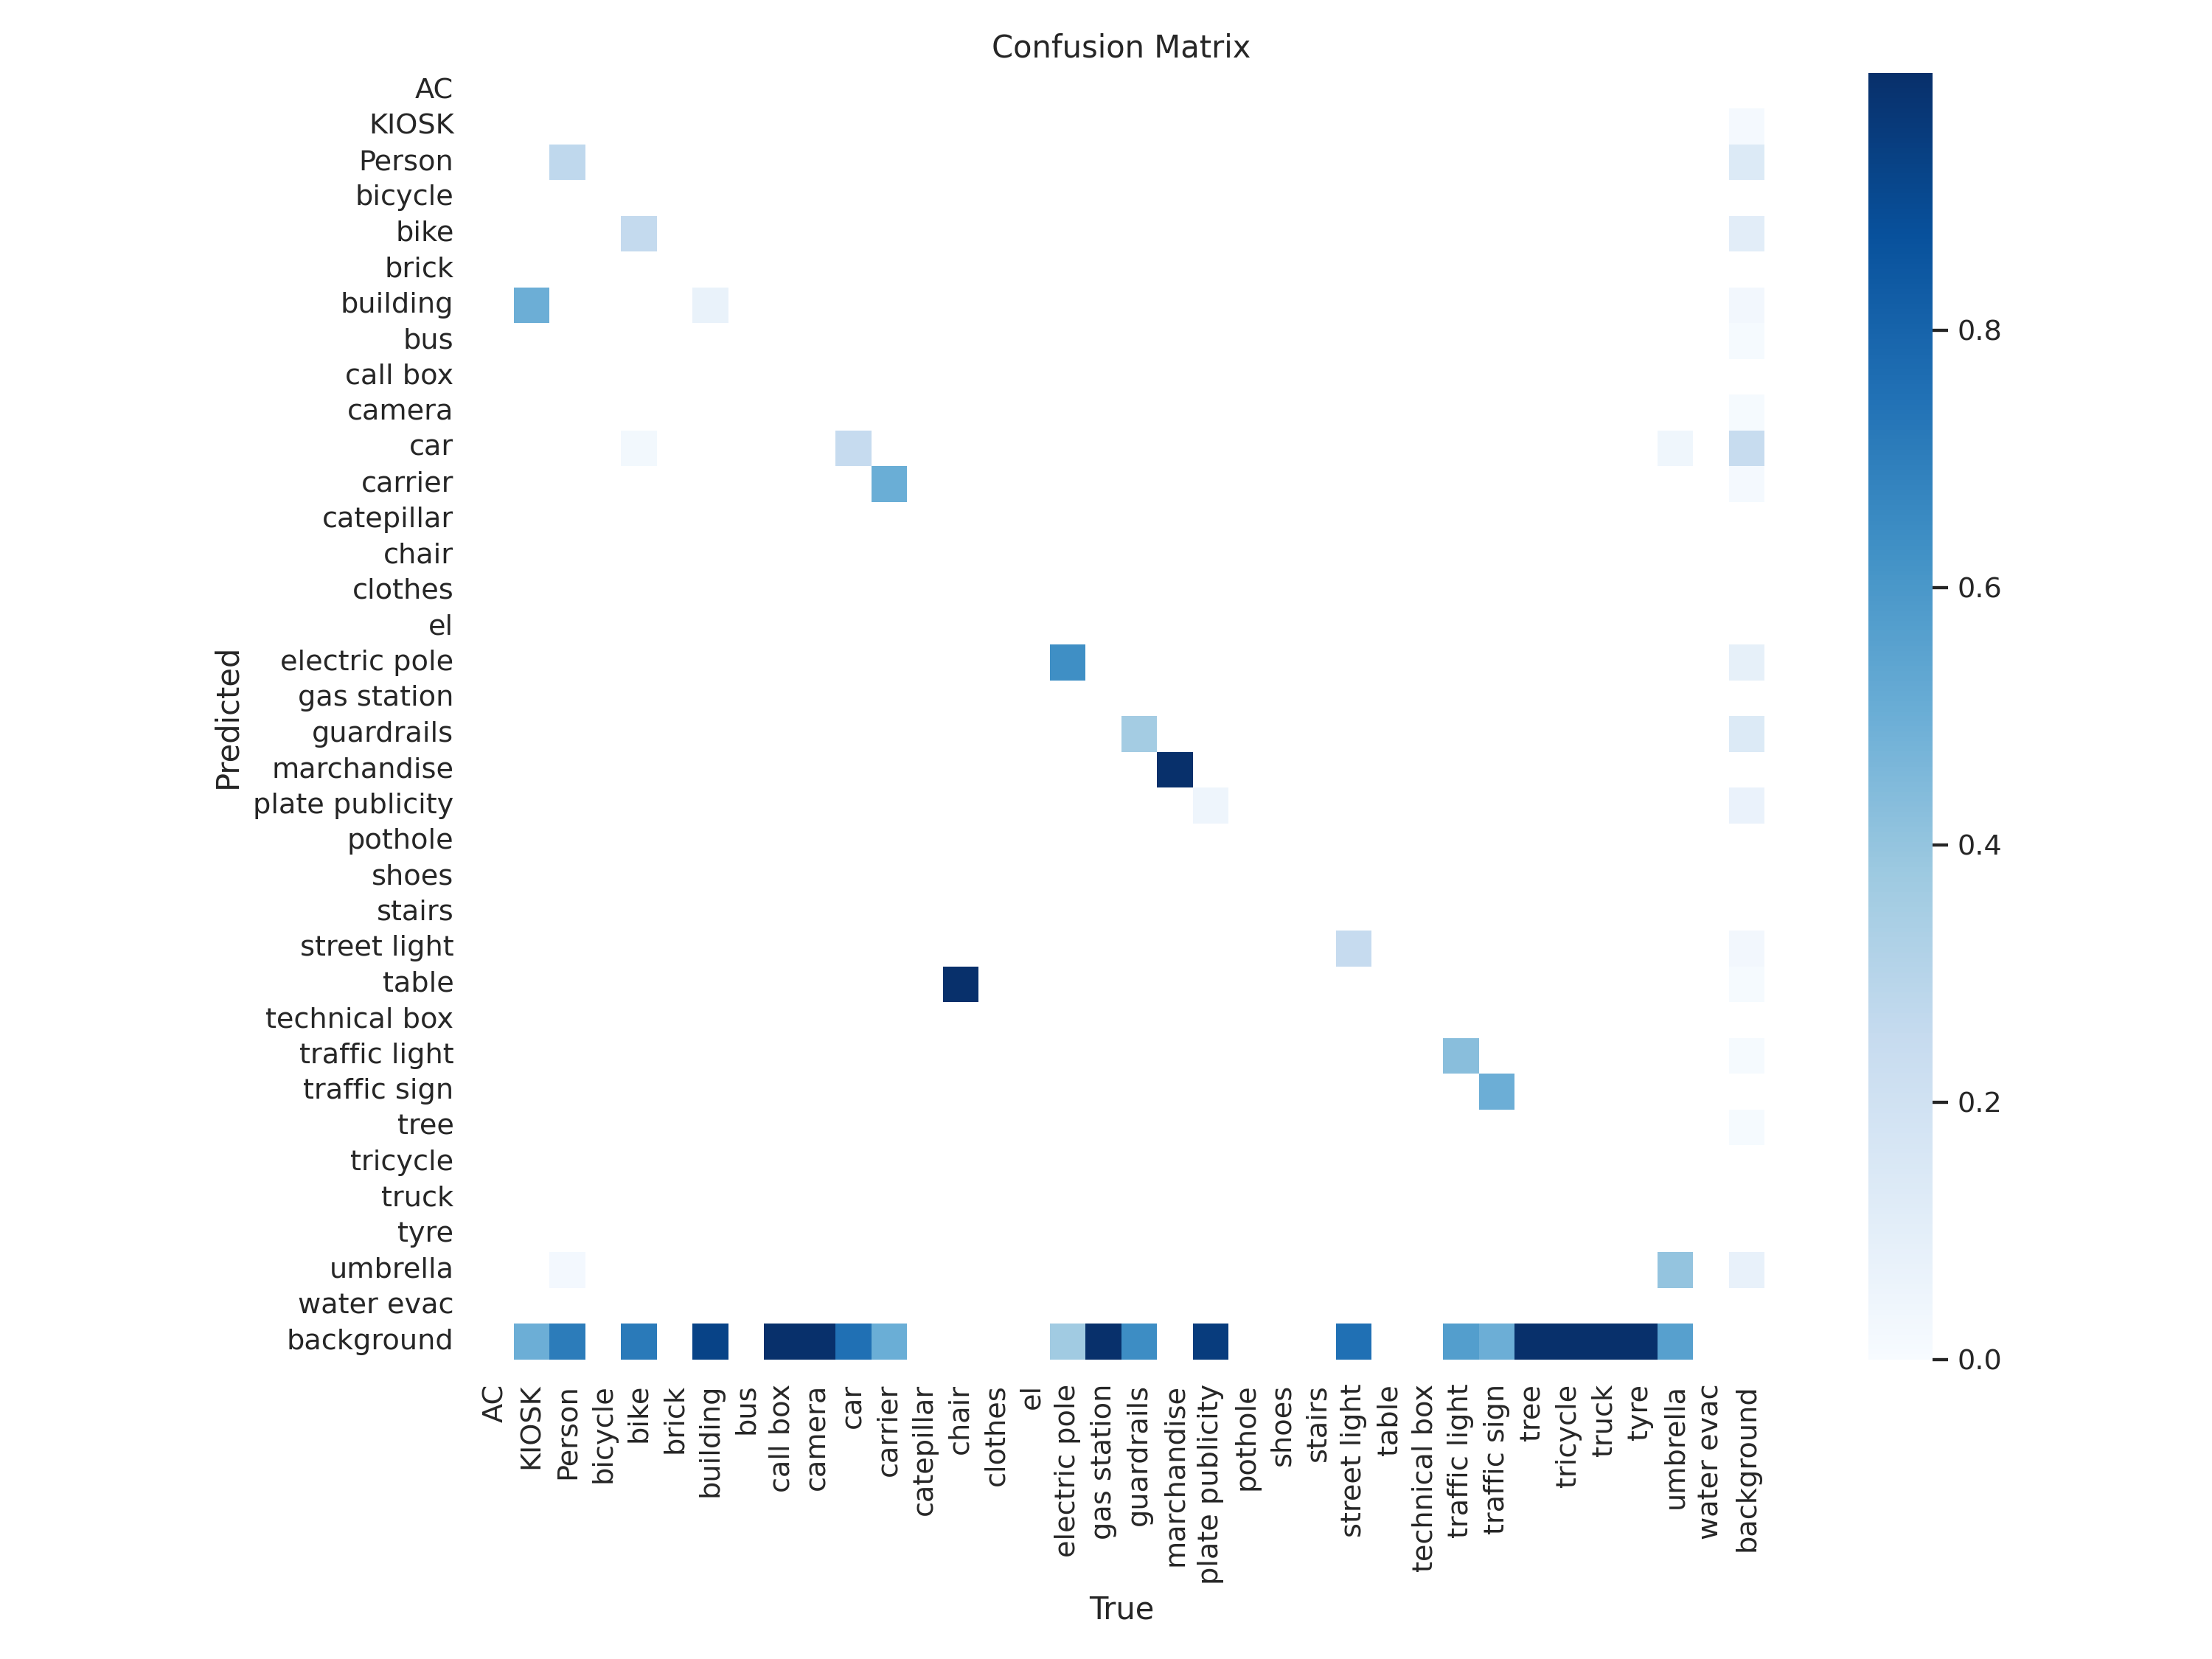

In [ ]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

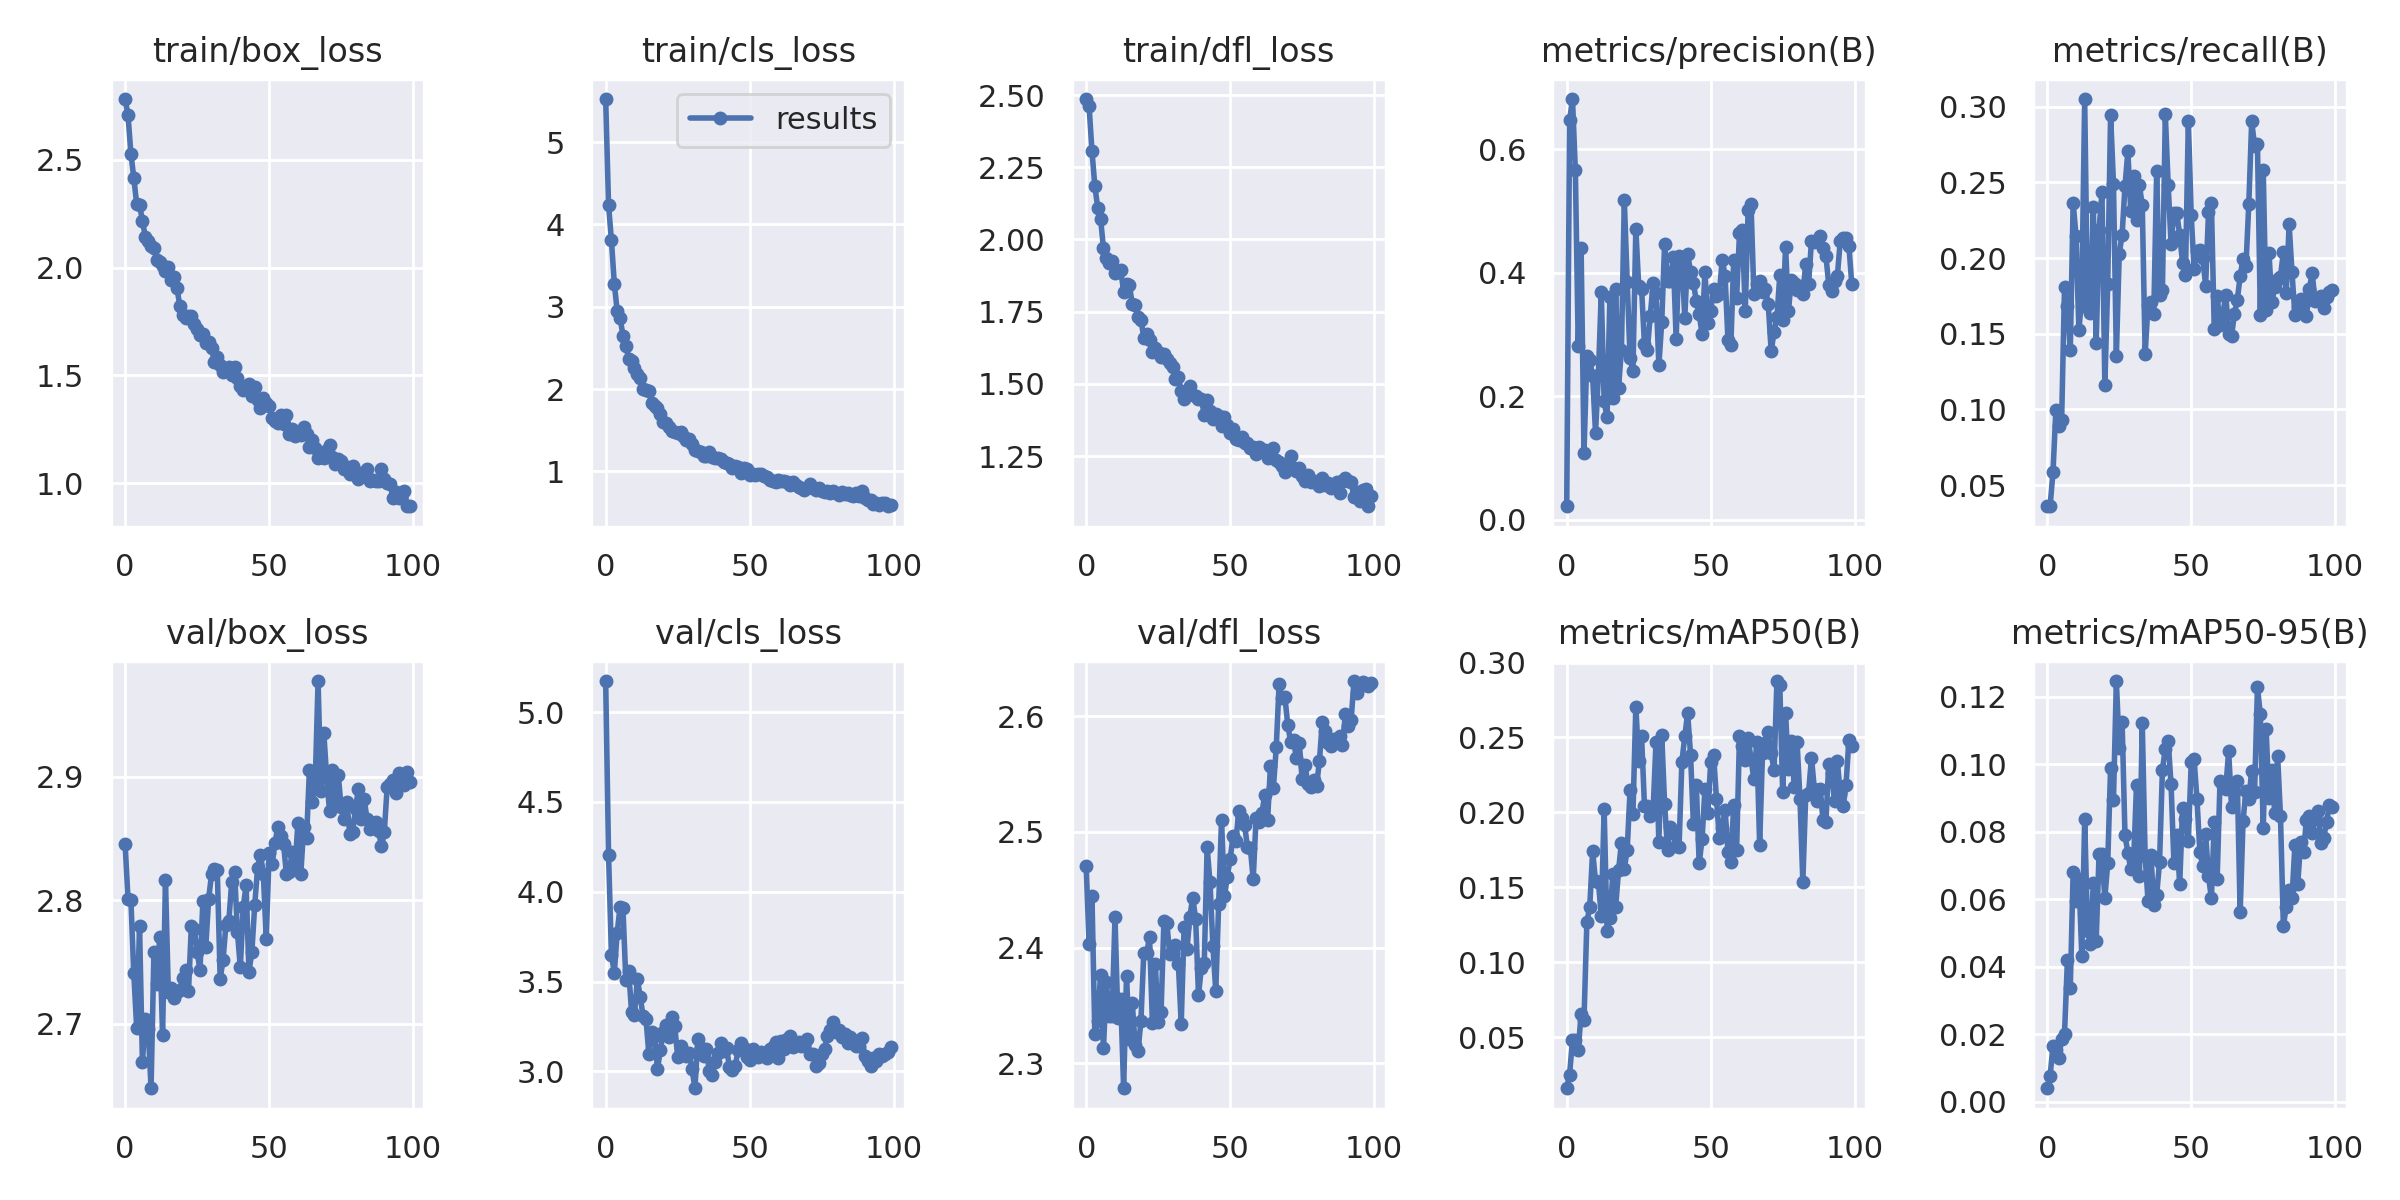

In [ ]:

Image(filename=f'/content/runs/detect/train/results.png', width=600)